# Lesson 3 - Notes

Started Watching: 3 Nov 2022

### [Video Link](https://www.youtube.com/watch?v=hBBOjCiFcuo&list=PLfYUBJiXbdtSvpQjSnJJ_PmDQB_VyT5iU&index=3&ab_channel=JeremyHoward)

# **Fast AI Lessons**

- Run notebook & Experiment
- Reproduce Results
    - Get started with Notebooks from ‘clean’
    - Ask → what’s this for, and what does it output?
- Repeat with different datasets
- **Research Shows more likely to do it if in a social activity**
    - There is also a Discord server
- Gradient Notebooks is apparently the best way to do the course!
    - Has free GPU’s
    - Can pay $8 or $9
    - They have persistent storage (which you don’t have on Kaggle or Google Colab) i.e - you can save the images…

# **Lesson 2 Summary**

- To use a models you’ve trained to create apps
- Understand that after you train, you can get a `model.pkl` which you can then use without a GPU to deploy.

# Choosing Models

- In the PyTorch image library, there are over 500 architectures.
    - Like Huggingface Transformers, but not for NLP.

[Which image models are best?](https://www.kaggle.com/code/jhoward/which-image-models-are-best)

The above link shows some research done into different models

### Which Model is Best

Plot of ‘seconds per sample’ and ‘how acurate’ on x and y axis.

Top-Left = best.

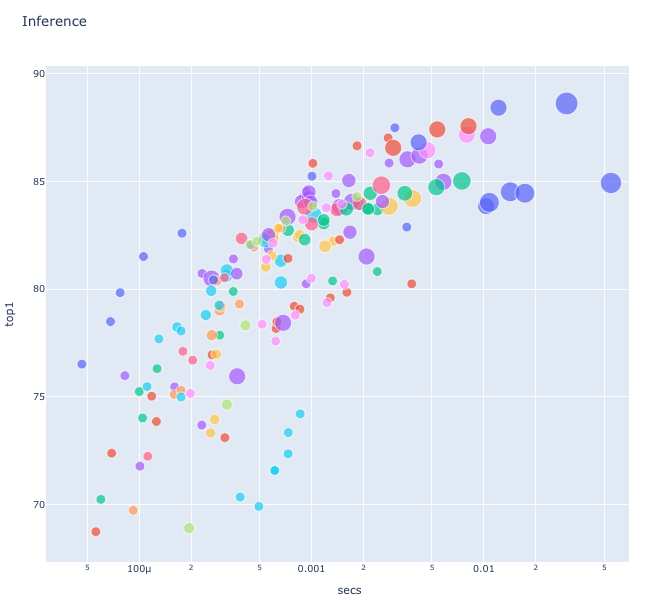

It’s an interactive graph, so you can hover to see which ones they are.



```jsx
import timm
timm.list_models['convnet']
learn = vision_learner(dls, 'convnext_tiny_in22k', etc
learn.fine_tune(3)
learn.export('model.pkl')
```

NB: need to reference by string because it’s not provided by default in fast.ai

Turn into application…

1. Load Learner
2. Predict `learn.predict(im)`
    1. Spits out probabilities list
    2. categories = learn.dls.vocab which gives back a list of strings of categories.
3. Then you can just turn into a gradio interface

# Making a model

1. Preprocessing steps
    1. Getting your data ready
2. Training your Model
    1. You can see your model by simply logging the model!

```python
m = learn.model
m # which infers print
```

Model

- Contains lots of layers
- Like a tree → layers contain layers like a tree
    - Stem
    - Stages
- Investivate using the `get_submodule` method

```python
l = model.get_submodule('0.model.stem.1)
list(l.parameters())
```

where `l.parameters` prints out all the weights (parameters) at that stage int he model.

# How does a neural network really work

- Things between $ signs in Jupyter are LaTeX
- plot_function requires fastbook


`from functools import partial` allows you to import something called a ‘partial’ which in python allows you to fix some of the values from a function!

**SUPER CLEVER**


`@interact` gives you some sliders to interact with data.

In [18]:
import fastbook
fastbook.setup_book()

In [19]:
from fastbook import *
from fastai.vision.widgets import *
from ipywidgets import interact
from fastai.basics import *

In [20]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

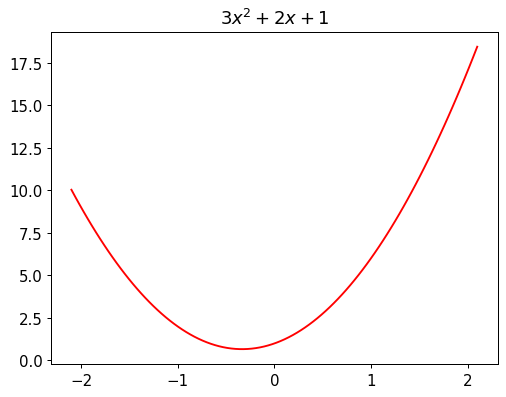

In [21]:
def f(x): return 3*x**2 + 2*x + 1
plot_function(f, "$3x^2 + 2x + 1$")

In [22]:
from numpy.random import normal, seed, uniform

Set's the seed, so each time it get's run, we get the same random numbers

In [23]:
np.random.seed(42)

`normal` used to create normally distributed random numbers

In [24]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

`torch.linspace` creates a tensor (a vector that goes from -2 to 2 in 20 equal steps

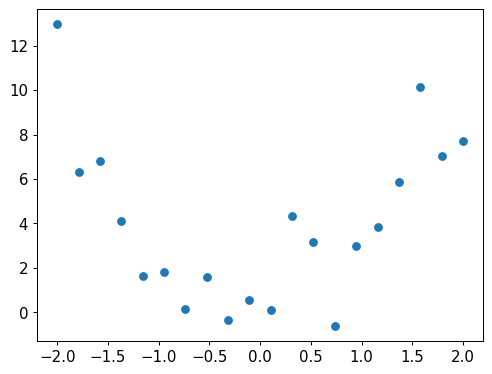

In [25]:
x = torch.linspace(-2,2,steps=20)[:,None]
y = add_noise(f(x), 0.4, 1.5)
plt.scatter(x,y)

In [26]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [27]:
quad(3,2,1, 1.5)

10.75

In [28]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

`plot_quad` plots the data and a function we pass in

`@interact` gives you sliders that you can use to interact with

Now you can move the fitted curve around to try fit the plot.

In [29]:
from ipywidgets import interact
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,12))

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

The most common loss function is a **Mean Squared Error** (MSE) - get's the difference predications and actuals, squares them and get's the mean.

By using MSE, you have a actual number that you can use to optimise to rather than just guessing.

In [30]:
def mse(preds, acts): return ((preds-acts)**2).mean()

In [1]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mse(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MSE: {loss:.2f}")

NameError: name 'interact' is not defined

**Derivative** measures the sensistivity to change of the function value (output value) with respect to a change in it's input value (argument).

i.e - the derivative of the position of a moving object with respect to time is it's velocity.
i.e - Calculate the derivative. The Slope. Does it increase or decrease and by how much? It's Gradient!

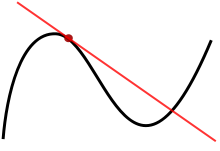
*The slope of the tanget line is equal to the derivative of the function at the marked point*

`*params` spreads out a list, similar to `...array` in javascript

In [32]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

quad_mse([1.5, 1.5, 1.5])

tensor(7.4269, dtype=torch.float64)

In PyTorch a **Tensor** is a 1D, 2D, 3D list of numbers

A 1D Tensor is also known as a **Rank 1 Tensor**

In [33]:
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

requires_grad says to give back the gradient too

In [34]:
loss = quad_mse(abc)
loss

tensor(7.4269, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [35]:
loss.backward()

This adds 'grad' to our tensor 'abc'

In [36]:
abc.grad

tensor([-3.8427,  4.0385, -0.5934])

This tells us that if we increase *a* the loss will change a lot, then a little with *b* and again more with *c*

In [37]:
with torch.no_grad():
    abc -= abc.grad*0.01 # 0.01 is a random step
    loss = quad_mse(abc)

print(f'loss={loss:.2f}')

loss=7.12


^^ Loss is going down as we do **GRADIENT DESCENT**

In [38]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=7.12
step=1; loss=6.58
step=2; loss=5.91
step=3; loss=5.25
step=4; loss=4.71


^^ Interestingly the longer you run it, it doesnt' always get better. i.e - you can overstep the local optimum!

In here - 0.01 is the **learning rate**

In [39]:
abc

tensor([2.1078, 0.7323, 1.5465], requires_grad=True)

^^Now have better parameters!

We can create an infinitely flexible function
- `torch.clip(y, 0.)` takes any number below 0 and turns it into 0

In [40]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

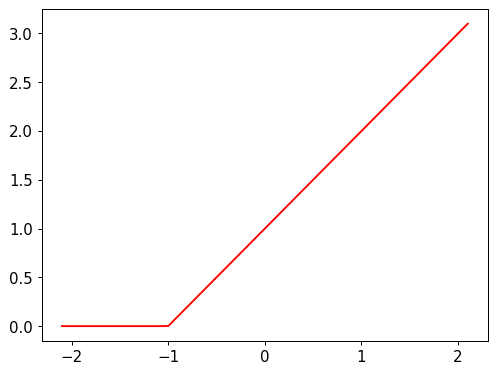

In [41]:
plot_function(partial(rectified_linear,1,1))

Becomes intersting when doing a double relu...which adds two ReLu and multiples together and get's some interesting functions.

BUT -> you can add as many ReLu's as you want, and get a function that creates any squiggly function and matches the data as accurately as it needs to be!

In [44]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1,b1,m2,b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

AND: These can be plotted over multiple dimensions over any number of planes!

Gadient Descent can help you optimise the parameters need to get the right values needed!

Deep Learning = Gradient descent set's parameters which are the addition of lots of Rectified linear units / similar to match our data!

### On choosing models:
- Use the 'Which Image Model is Best' graph > running lots of models
- At the start of a project use the simple / fast ones (i.e - Resnet18/34) because want to try different data-augmentation, different ways of cleaning the data, different external data I want to bring it. AND want to try this as fast as possible.
- Trying different architectures is the last thing...then decide on more accuracy vs. more speed -> then try some later models.


### On enough data?
- You can't know in advance
- Try training a model early and see if it works?
- Try train a model on a simple model
- Semi-Supervised learning and data-augmentation is very helpful with creating "more data"
- Often easier to get raw-input data that doesn't have labels, but often expensive to get labels

### Hyper Parameters
- Learning Rate is a hyper parameter
 - Fast.ai generally uses good default hyper-parameters, but sometime you will need to spend time to optimise these.
 
If the learning rate is too big, then it will diverge and your result will too incorrect. If your learning rate is too small it will take an awfully long time.

## Matrix Multiplication

One of the variables might actually be an image (i.e - numbers in an image) so this requires multiplying the coefficient by all pixels in an image / matrix.

Linear Algebra in Deep Learning is mostly just Matrix Multiplicaiton.

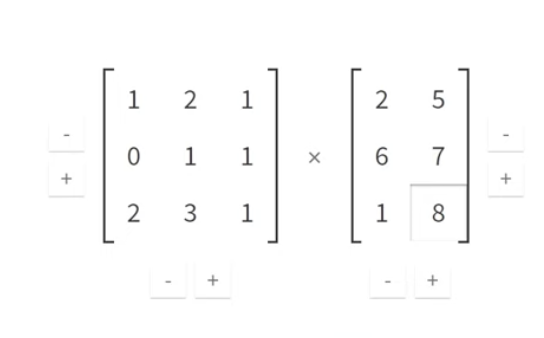

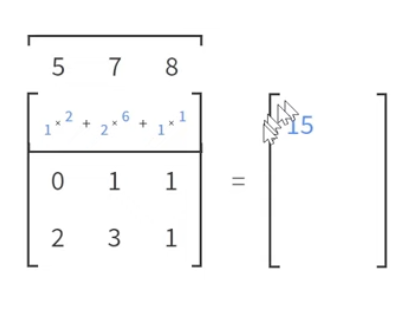

 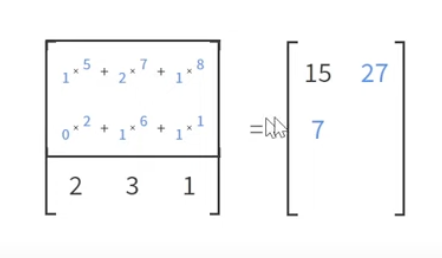
 
Multiply first row by first column and add = first number
Multiply first row by second colun and add = second number in first row

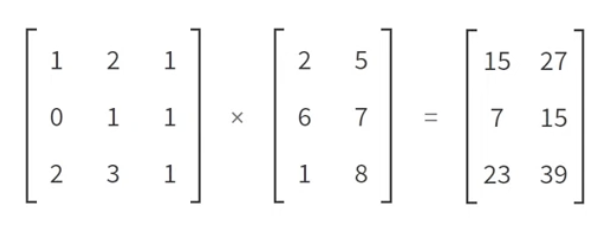

Final step in a neural network, would be to replace any negatives with zeros. GPU's are good at dealing with matrix multiplication!

## Titanic NN in Excel

Trying to predict if someone survives (1/0)

First thing, was to make sure the data was clear.
- Remove any rows with missing data (i.e - missing ages)
- For Categorical values, need to convert to numbers. i.e (male = 1, female = 2) -> `if([@sex]="male",1,0)` or ('Embarded')
- For first, second class, they are not a scalar continuous measurement - they are levels, they are still kind of categories, so he converted these too to 'Binary Categorical Variables' --> Created new columns!
- Created random numbers in excel (=rand()-0.5) in real life, we start at random numbers a bit more and a bit less than zero!
- Interestingly, the only thing that mattered in the end was the fare, because these numbers were just bigger than all other numbers. Want's everything to be **normalised** to 0 - 1.
- Fast.ai does all of the above for us! But all this IS being done!
- If you have some set of values that are unevely distributed, i.e - with the 'fare' where most are quite low numbers and a small number are massive numbers, then it's better to take the LOG of this range to make it more accurate to the normalised scale. i.e in excel `LOG10([@Fare]+1)` -> could normalise too!
- At this point, all columns are all around the same level, so no columns will likely 'saturate the rest'
- Then do a SUMPRODUCT of the values with the random initial parameter values.
- y = mx+b. m=your parameter, x = your data. 
    - For 'b', create an extra column of data initialised all to 1's, then this becomes your constant term.
- To create the loss value, simply do the prediction (the matrix multiplication of values by the randomised parameters). The real value (1/0 for survived) - prediction ^ 2 (squared) -> to get the mean squared error.
- Once you have the number, you have to do 'gradient descent'
    - MS excel has one! "Solver"
    - Choose what to optimise (average loss)
    - How to change it, by optimising the initially random parameters
- After running the solver, you can check the predictions by looking at the loss for each of the data!
- To change it from a linear regression to a neural network, you need two layers! (i.e - two sets of random numbers)
- Linear vs. ReLU is the swapping of less than zeros for 0. In excel, simply `=If(NUM<0, 0, NUM)`
- Then add the ReLu's together to get the prediction and new Loss
- Only difference for Matrix Multiplication, is transpose the data. Rows and Cols the other way down.
- Instead of sumProduct (MMULT(all values by all valeus)!)
- Titanic Kaggle Comp is a fun Comp to try out...

(Chapter 4 is this lesson -> this is the lesson where loose most people)

- Try building titanic from Scratch in Python!

When creating the class (given there are three calsses) you only need two dummy variables (Pclass1 and pclass2) because the computer can infert that pclass3 is just when it's neither pclass1 or pclass2.









## NLP

Huggingface Transformers -> need to do things more manually.
Good to see what you need to do...

Transformers are particularly good -> good models, good practices.

Documents refer to different lengths of text from 1 word to a book.
